In [148]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [150]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [151]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [152]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# ANN

In [153]:
# normalization = nothing but conveting rgb range(255) into the rang(0-1)
X_train = X_train /255
X_test = X_test/255

In [154]:
X_train.shape

(60000, 28, 28)

In [155]:
ANN  = keras.Sequential([
    keras.layers.Flatten( input_shape = (28,28,)), # flattend layer
    keras.layers.Dense(100, activation='relu'), # hidden layer with 100 dense layers
    keras.layers.Dense(50, activation='relu'), # hidden layers
    keras.layers.Dense(10,activation = 'sigmoid') # out layers with 10 output neurons output range(0-9)
    
    ])
ANN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [156]:
ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8659 - loss: 0.4540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9643 - loss: 0.1190
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9754 - loss: 0.0824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9817 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0461


In [157]:
ANN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0956


[0.08025354146957397, 0.9761999845504761]

In [159]:
ANN_prediction = ANN.predict(X_test)
ANN_prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.2332609e-02, 1.4701448e-03, 8.9449763e-02, ..., 9.9999738e-01,
        6.9068298e-03, 9.8893327e-01],
       [1.2030100e-02, 9.5500672e-01, 9.9999994e-01, ..., 3.4840843e-03,
        7.6656997e-01, 6.8611251e-07],
       [1.5617391e-02, 9.9977392e-01, 5.7098899e-02, ..., 5.6162834e-01,
        4.4401255e-01, 1.8440839e-02],
       ...,
       [1.8433434e-07, 6.8372842e-06, 4.2255640e-05, ..., 8.9049429e-01,
        1.0516357e-01, 9.9979937e-01],
       [1.1875711e-05, 2.6145946e-05, 5.8410544e-04, ..., 8.0031803e-04,
        9.6308994e-01, 3.0122802e-04],
       [9.5599306e-01, 1.7086424e-07, 3.6083121e-02, ..., 1.6721172e-03,
        5.4647555e-03, 6.9633569e-03]], dtype=float32)

In [162]:
ANN_prediction = [np.argmax(no) for no in ANN_prediction]

In [177]:
ANN_prediction[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [178]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

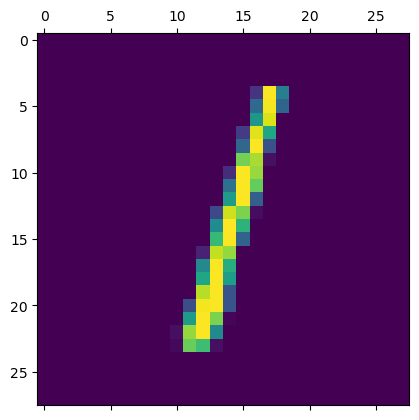

In [190]:
plt.matshow(X_test[2])

(60000, 28, 28)

# CNN

In [200]:
CNN = keras.Sequential([
    # 1st cnn layer
    keras.layers.Conv2D(filters= 30, kernel_size=(3,3),activation='relu',input_shape = (28,28,1)),# convolutional layer
    # NOTE : mentioned input_shape same as kernel_size and most take 3d array
    keras.layers.MaxPooling2D((2,2)),# pooling layer
    # 2nd cnn layer
    keras.layers.Conv2D(filters= 30, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    # ann
    keras.layers.Flatten(),# flattend layer and input layer
    keras.layers.Dense(100, activation='relu'),# hidden layer
    keras.layers.Dense(10, activation = 'softmax')#output layer
])

In [206]:
CNN.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [207]:
CNN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9822 - loss: 0.0565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9888 - loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9926 - loss: 0.0238
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9949 - loss: 0.0187
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9951 - loss: 0.0157


In [208]:
CNN.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0417


[0.03366178274154663, 0.9900000095367432]

In [214]:
print(f'Compare the Accuracy: \nANN:{ANN.evaluate(X_test,y_test)} \nCNN : {CNN.evaluate(X_test,y_test)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9723 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9880 - loss: 0.0417
Compare the Accuracy: 
ANN:[0.08025354146957397, 0.9761999845504761] 
CNN : [0.03366178274154663, 0.9900000095367432]


In [215]:
# always CNN gives more accuracy than the ann model.. for computer vesion problems.(image classification and object detection)

In [217]:
cnn_prediction = CNN.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [218]:
cnn_prediction = [np.argmax(no) for no in cnn_prediction]

In [224]:
print(f'comparing \nprediction:{cnn_prediction[:10]} \nreal_data{y_test[:10]}')

comparing 
prediction:[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] 
real_data[7 2 1 0 4 1 4 9 5 9]


In [225]:
from sklearn.metrics import classification_report

In [229]:
print(f'classification_report:\n{classification_report(y_test,cnn_prediction)}')

classification_report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

